## basit dogrusal regresyon - model


In [1]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

# index'i degisken olarak aldı
# ad = pd.read_csv('Advertising.csv', usecols = [1,2,3,4]) olarak yazarsak da bu sorundan kurtulabiliriz.

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:, 1: len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [5]:
df.isnull().values.any()

# veri setinin icerisinde eksik gozlem olup olmadigini kontrol ettik.

False

In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


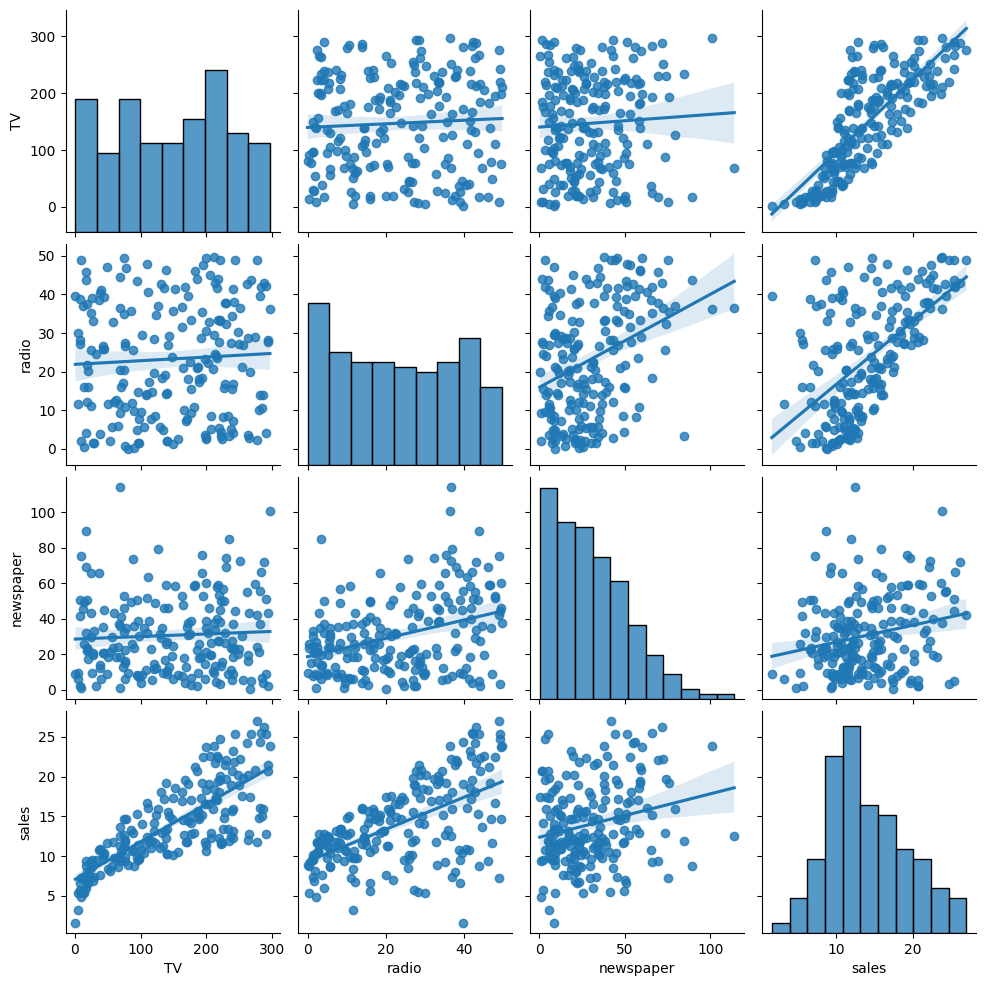

In [7]:
import seaborn as sns

sns.pairplot(df, kind="reg")

# olusturulan grafiklerdeki cizginin egiminin dusmesi o iliskinin yok oldugu, egimi eksiye dondugunde ise
# negatif yonde iliskinin oldugunu gosterir.

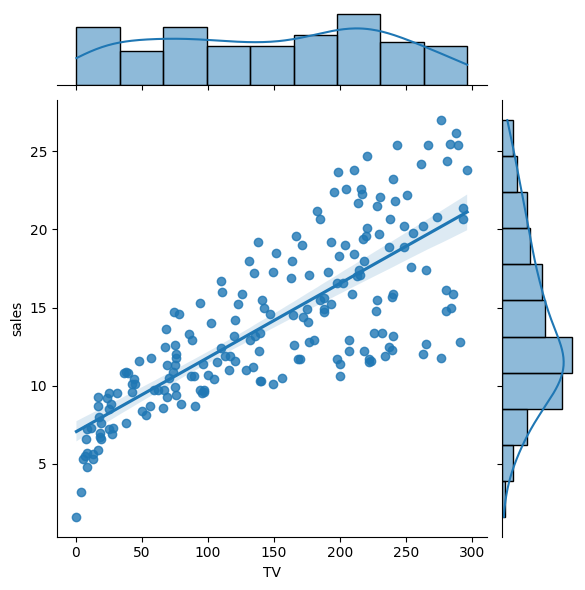

In [8]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

# tv harcamalari ile satislar arasindaki iliskiyi inceliyoruz

#### ========================================================

#### statsmodels ile modelleme


In [9]:
import statsmodels.api as sm

x = df[["TV"]]
x[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
x = sm.add_constant(x)
x[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [11]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [12]:
lm = sm.OLS(y, x)
model = lm.fit()

# lm = lineer model

In [13]:
model.summary()

# r-squared degeri, modele deger ekledikce siser ve bu degeri takip etmek her zaman iyi degildir
# adj. r-squared degeri ise, duyarliligi daha az olan degerdir.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        20:12:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

        coef	std err	   t	P>|t|	[0.025	0.975]

const 7.0326 0.458 15.360 0.000 6.130 7.935
TV 0.0475 0.003 17.668 0.000 0.042 0.053

bu kısım bizim için önemli

coef = beta0
std err = standart hata
bu degerlerin anlamli olup olmadigini anlayabilmek adina t ve P>|t| verilmis
[0.025 0.975] = guven araligi


#### ========================================================


In [14]:
import statsmodels.formula.api as smf

lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

# degisken ismi vererek kullanma

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           1.47e-42
Time:                        20:12:40   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params

# SANIRIM
# intercept = beta0
# tv = beta1

Intercept    7.032594
TV           0.047537
dtype: float64

In [16]:
model.summary().tables[1]

# katsayı detaylarına erişmek

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [17]:
model.conf_int()

# katsayıların güven aralıklarına erişmek

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [18]:
model.f_pvalue

# modelin anlamlılığına ait istatistiklere erişmek

1.467389700194656e-42

In [19]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

# pvalue degerini virgulden sonra 4 basamak olacak şekilde yazdırdık

f_pvalue:  0.0000


In [20]:
print("fvalue: ", "%.2f" % model.fvalue)

# f istatistiğini virgülden sonra 2 basamak olacak şekilde yazdırdık

fvalue:  312.14


In [21]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

# parametre anlamlılığına ilişkin değerlere eriştik

tvalue:  15.36


In [22]:
model.mse_model

# modelin anlamlılığına ilişkin model değerlendirme istatistiklerine erişmek

3314.6181668686486

In [23]:
model.rsquared

0.611875050850071

In [24]:
model.rsquared_adj

0.6099148238341623

In [25]:
model.fittedvalues[0:5]

# modelin tahmin ettiği değerlere erişmek

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [26]:
y[0:5]

# bunlar da gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [27]:
print(
    "Sales = "
    + str("%.2f" % model.params[0])
    + " + TV"
    + "*"
    + str("%.2f" % model.params[1])
)

# kurduğumuz modelin matematiksel fonksiyonu

Sales = 7.03 + TV*0.05


#### ========================================================

#### gorsellestirme


Text(0.5, 0, 'TV Harcamaları')

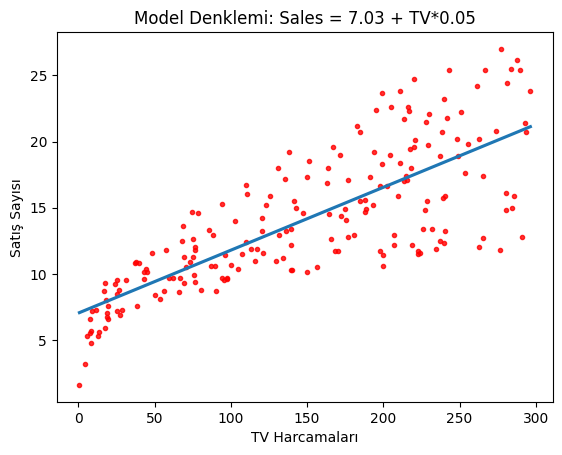

In [28]:
g = sns.regplot(x="TV", y="sales", data=df, ci=None, scatter_kws={"color": "r", "s": 9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
x = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(x, y)
model.intercept_

# model katsayısını aldık (beta0)

7.032593549127695

In [31]:
model.coef_

# beta1 katsayısını aldık

array([0.04753664])

In [32]:
model.score(x, y)

# score = r^2 değerini ifade eder. başarı değeri değildir.

0.611875050850071

In [33]:
model.predict(x)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])